### Import numpy and pandas to get started

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

### Preprocessing/Analysis (28 pts) 

1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places. 

In [2]:
csv_file = "EuCitiesTemperatures.csv"
eu_temp_df = pd.read_csv(csv_file)

In [3]:
miss_lat = eu_temp_df[eu_temp_df["latitude"].isna()]

In [4]:
miss_lat_countries = miss_lat["country"].unique()

In [5]:
country_avg_lat_dict = {}
for country in miss_lat_countries:
    avg = eu_temp_df.loc[(eu_temp_df["country"]==country) & (~eu_temp_df["latitude"].isna()), "latitude"].mean()
    avg = round(avg, 2)
    country_avg_lat_dict[country] = avg

In [6]:
for country in miss_lat_countries:
    eu_temp_df.loc[(eu_temp_df["country"]==country) & (eu_temp_df["latitude"].isna()), "latitude"] = country_avg_lat_dict[country]

In [7]:
miss_long = eu_temp_df[eu_temp_df["longitude"].isna()]

In [8]:
miss_long_countries = miss_long["country"].unique()

In [9]:
country_avg_long_dict = {}
for country in miss_long_countries:
    avg = eu_temp_df.loc[(eu_temp_df["country"]==country) & (~eu_temp_df["longitude"].isna()), "longitude"].mean()
    avg = round(avg, 2)
    country_avg_long_dict[country] = avg

In [10]:
for country in miss_long_countries:
    eu_temp_df.loc[(eu_temp_df["country"]==country) & (eu_temp_df["longitude"].isna()), "longitude"] = country_avg_long_dict[country]

In [11]:
eu_temp_df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.) 

In [12]:
in_geo_band = eu_temp_df.loc[(eu_temp_df["latitude"] >= 40) & (eu_temp_df["latitude"] <= 60) & (eu_temp_df["longitude"] >= 15) & (eu_temp_df["longitude"] <= 30)]

In [13]:
country_city_count = in_geo_band.groupby(["country"]).size()
max_cities = country_city_count.max()
max_city_country_list = [country for country in country_city_count.keys() if country_city_count[country]==max_cities]
max_city_country_list #answer

['Poland', 'Romania']

In [14]:
max_city_country_frames = []
for country in max_city_country_list:
    frame = eu_temp_df[eu_temp_df["country"]==country]
    max_city_country_frames.append(frame)

In [15]:
max_city_country_df = pd.concat(max_city_country_frames)
max_city_country_df #dataframe that shows all cities in the max countries

,city,country,population,EU,coastline,latitude,longitude,temperature
108,Bialystok,Poland,38.59,yes,yes,53.15,23.17,6.07
109,Bydgoszcz,Poland,38.59,yes,yes,53.12,19.43,7.14
110,Bytom,Poland,38.59,yes,yes,52.48,19.43,NaN
111,Elblag,Poland,38.59,yes,yes,52.48,19.40,6.68
112,Kielce,Poland,38.59,yes,yes,50.89,20.66,7.29
113,Koszalin,Poland,38.59,yes,yes,54.20,19.43,NaN
114,Poznan,Poland,38.59,yes,yes,52.41,16.90,8.31
115,Wroclaw,Poland,38.59,yes,yes,51.11,17.03,NaN
116,Warsaw,Poland,38.59,yes,yes,52.48,19.43,7.20
119,Botosani,Romania,19.37,yes,yes,47.75,26.66,8.23


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (Yes/No) and whether it has a coastline (yes/no). For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='No' and coastline='Yes') 

In [16]:
# tuple: (x, y) -> x = EU, y = coastline
region_types = [("no", "no"), ("no", "yes"), ("yes", "yes"), ("yes", "no")]

In [17]:
region_type_avg_temp_dict = {}
for region in region_types:
    avg = eu_temp_df.loc[(eu_temp_df["EU"]==region[0]) & (eu_temp_df["coastline"]==region[1]) & (~eu_temp_df["temperature"].isna()), "temperature"].mean()
    avg = round(avg, 2)
    region_type_avg_temp_dict[region] = avg

In [18]:
for region in region_types:
    eu_temp_df.loc[(eu_temp_df["EU"]==region[0]) & (eu_temp_df["coastline"]==region[1]) & (eu_temp_df["temperature"].isna()), "temperature"] = region_type_avg_temp_dict[region]

In [19]:
eu_temp_df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Visualization (27 pts) 
##### For all plots, make sure to label the axes, and set appropriate tick labels.

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above. 

In [57]:
region_types_dict = {}
for region in region_types:
    eu_stat = "EU" if region[0].lower()=="yes" else "No EU"
    coast_stat = "Coastal" if region[1].lower()=="yes" else "No Coastal"
    key = (eu_stat, coast_stat)
    no_cities = len(eu_temp_df[(eu_temp_df["EU"]==region[0]) & (eu_temp_df["coastline"]==region[1])])
    region_types_dict[key] = no_cities

In [58]:
region_df = DataFrame(region_types_dict.items(), columns=["Region Type", "No. Cities"])

Text(0.5, 1.0, 'Region Type to No. Cities')

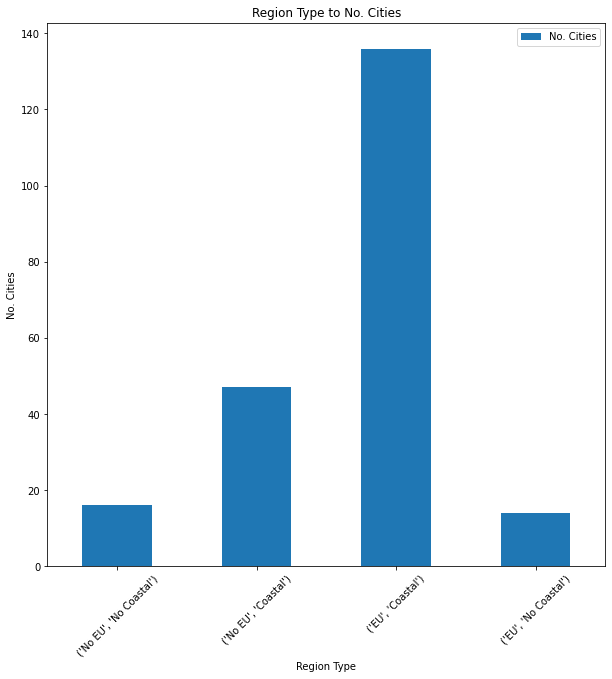

In [80]:
region_bar_axes = region_df.plot.bar(rot=45, figsize=(10,10))
region_bar_axes.set_xlabel("Region Type")
region_bar_axes.set_xticklabels(region_df["Region Type"])
region_bar_axes.set_ylabel("No. Cities")
region_bar_axes.set_title("Region Type to No. Cities")

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color. 

In [23]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [24]:
country_list = eu_temp_df["country"].unique()

In [25]:
colormap = cm.viridis
color_list = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(country_list))]

In [26]:
color_dict = {country_list[idx]: color_list[idx] for idx in range(len(color_list))}

Text(0.5, 1.0, 'Latitude-Longitude Scatterplot for Cities')

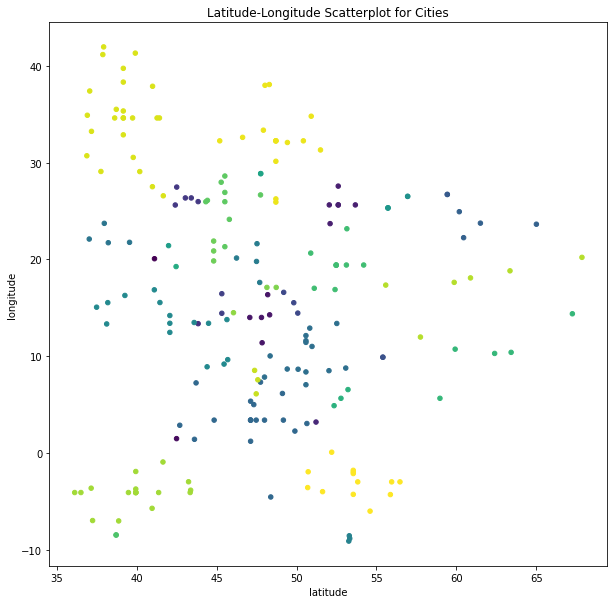

In [75]:
scatter_axes = eu_temp_df.plot.scatter(x="latitude", y="longitude", c=eu_temp_df["country"].map(color_dict), figsize=(10,10))
scatter_axes.set_title("Latitude-Longitude Scatterplot for Cities")

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups). 

Text(0.5, 1.0, 'Population Group to No. Countries')

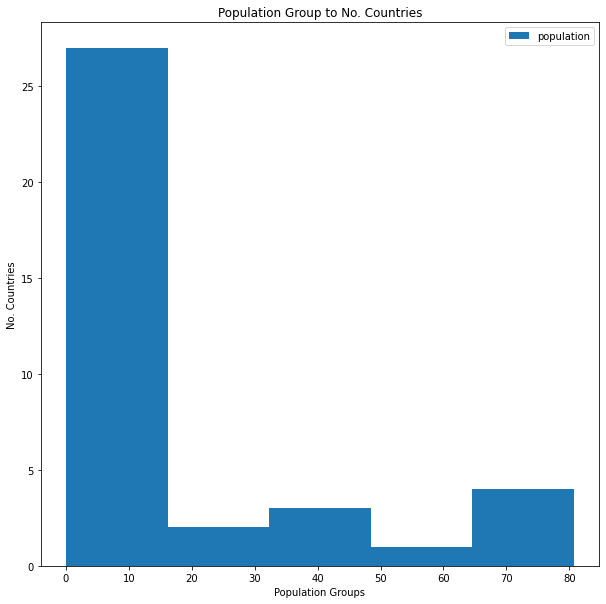

In [76]:
hist_axes = eu_temp_df.loc[:, ["country", "population"]].drop_duplicates("country").plot.hist(bins=5, figsize=(10,10))
hist_axes.set_xlabel("Population Groups")
hist_axes.set_ylabel("No. Countries")
hist_axes.set_title("Population Group to No. Countries")

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above. Each subplot should be a scatter plot of city v/s temperature, where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to to an array of numbers from 0 to n (number of cities). 

In [71]:
no_eu_no_coastal_df = eu_temp_df[(eu_temp_df["EU"]=="no") & (eu_temp_df["coastline"]=="no")].copy()
no_eu_no_coastal_df.loc[:, "_index"] = np.arange(len(no_eu_no_coastal_df))

no_eu_yes_coastal_df = eu_temp_df[(eu_temp_df["EU"]=="no") & (eu_temp_df["coastline"]=="yes")].copy()
no_eu_yes_coastal_df.loc[:, "_index"] = np.arange(len(no_eu_yes_coastal_df))

yes_eu_yes_coastal_df = eu_temp_df[(eu_temp_df["EU"]=="yes") & (eu_temp_df["coastline"]=="yes")].copy()
yes_eu_yes_coastal_df.loc[:, "_index"] = np.arange(len(yes_eu_yes_coastal_df))

yes_eu_no_coastal_df = eu_temp_df[(eu_temp_df["EU"]=="yes") & (eu_temp_df["coastline"]=="no")].copy()
yes_eu_no_coastal_df.loc[:, "_index"] = np.arange(len(yes_eu_no_coastal_df))

In [72]:
def create_color_list(_df):
    _color_list = [("red" if temp > 10 else ("blue" if temp < 6 else "orange")) for temp in _df["temperature"].to_list()]
    return _color_list

Text(0.5, 0, '')

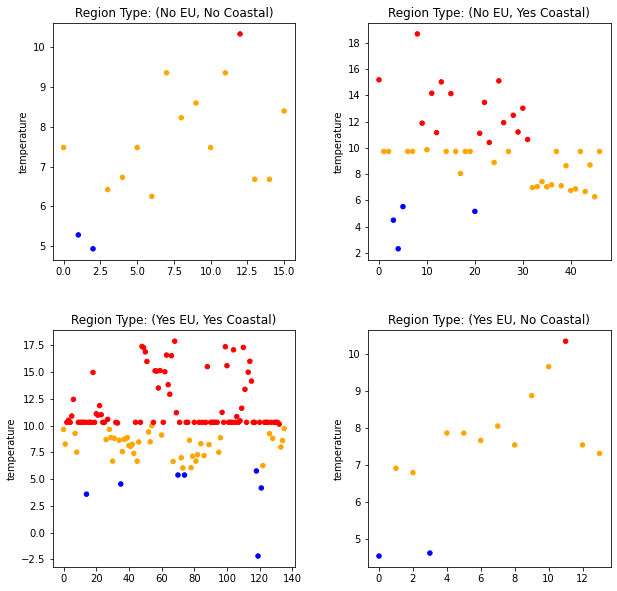

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)

no_no_ax = no_eu_no_coastal_df.plot.scatter(x="_index", y="temperature", c=create_color_list(no_eu_no_coastal_df), ax=axes[0,0])
no_no_ax.set_title("Region Type: (No EU, No Coastal)")
no_no_ax.set_xlabel("")

no_yes_ax = no_eu_yes_coastal_df.plot.scatter(x="_index", y="temperature", c=create_color_list(no_eu_yes_coastal_df), ax=axes[0,1])
no_yes_ax.set_title("Region Type: (No EU, Yes Coastal)")
no_yes_ax.set_xlabel("")

yes_yes_ax = yes_eu_yes_coastal_df.plot.scatter(x="_index", y="temperature", c=create_color_list(yes_eu_yes_coastal_df), ax=axes[1,0])
yes_yes_ax.set_title("Region Type: (Yes EU, Yes Coastal)")
yes_yes_ax.set_xlabel("")

yes_no_ax = yes_eu_no_coastal_df.plot.scatter(x="_index", y="temperature", c=create_color_list(yes_eu_no_coastal_df), ax=axes[1,1])
yes_no_ax.set_title("Region Type: (Yes EU, No Coastal)")
yes_no_ax.set_xlabel("")